# UCB Algorithm

This is a very basic implementation of UCB algorithm with a Bernoulli reward.

For an elaborated code and more details, please check the project : **On Bayesian Badnit Problems**

In that project we developed a scalable framework (in python) and implemented many other algorithms (Bayesian and Frequentist).

In [1]:
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
#Simulate the bernoulli rewards

# T : Horizon
# K : nb of arms
# Nu : paramter of bernoulli dist

def simulate_bandit(K,Nu,T):
    Res=np.zeros((K,T))
    for i in range(K):
        Res[i,:]=bernoulli.rvs(Nu[i], size=T)
    return Res

In [4]:
# Update the UCB 
# Inputs : 
# Alpha : hyper-paramter of the algorithm (>=2)
# Res : The rewards
# Nu_hat : estimated mean for each arm
# I_hat : nb of time each arm has been pulled until time t
# t : time t
# 
# Outputs : 
# Update I_hat, Nu_hat aand output observed reward and UCB at time t

def Update_UCB(Res,Nu_hat,I_hat,alpha,t):
    UCB_t=Nu_hat + np.sqrt(alpha*np.log(t+1)/(2*I_hat))
    I_t=np.argmax(UCB_t)
    Obs_t=Res[I_t,t]
    Nu_hat[I_t]=(Nu_hat[I_t]*I_hat[I_t] + Obs_t)/(I_hat[I_t]+1)
    I_hat[I_t]+=1
    return Nu_hat,I_hat,UCB_t,Obs_t

In [9]:
# Run simulation for K arms, up to time T with rewards in Res


def Simulate_UCB(Res,K,T,alpha=3):
    Nu_hat=np.zeros(K)
    I_hat=np.zeros(K)
    UCB = np.zeros((K,T))
    UCB_G = np.zeros(T)
    for t in range(T):
        Nu_hat,I_hat,UCB_t,Obs_t=Update_UCB(Res,Nu_hat,I_hat,alpha,t)
        UCB[:,t]=UCB_t
        if t>0:
            UCB_G[t]=Obs_t+UCB_G[t-1]
        else:
            UCB_G[t]=Obs_t
        #print 'Nu_hat=',Nu_hat,' I=',I_hat
    return UCB,UCB_G

In [28]:
# K Nb of arms 
# T horizon

K=3
T=5000

# Rewards

#Nu=np.random.uniform(0,1,K)
Nu = [0.1,0.15,0.5]
Res=simulate_bandit(K,Nu,T)
print(Res)


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  1. ...,  0.  0.  1.]]


In [29]:
UBC,UCB_G=Simulate_UCB(Res,K,T)

/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in true_divide


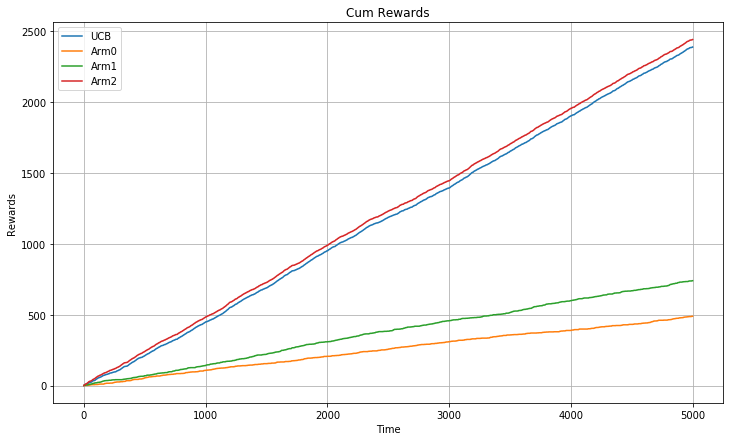

In [30]:

plt.figure(figsize=(12,7))
plt.plot(UCB_G,label='UCB')
for i in range(K):
    plt.plot(np.cumsum(Res[i,:]),label='Arm'+str(i))
plt.legend()
plt.title("Cum Rewards")
plt.xlabel('Time')
plt.ylabel('Rewards')
plt.grid()


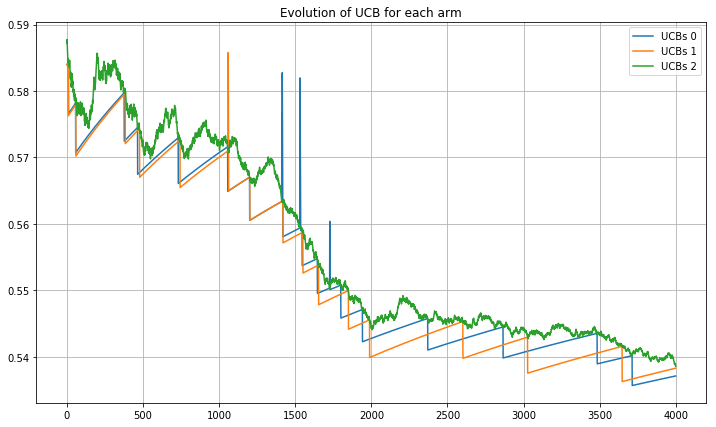

In [41]:
plt.figure(figsize=(12,7))
s=1000
#plt.plot(UBC[0,s],label = 'sup UCB')
for i in range(K):
    plt.plot(UBC[i,s:].transpose(),label='UCBs '+str(i))
plt.legend()
plt.title('Evolution of UCB for each arm')
plt.grid()